### Prediction a number based on combination of variables

In [1]:
import tensorflow as tf

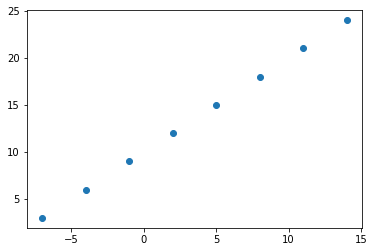

In [2]:
# Create some data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0,6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x,y)

In [3]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
X = tf.constant(x)
Y = tf.constant(y)
X, X.shape,Y, Y.shape

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 TensorShape([8]),
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>,
 TensorShape([8]))

### Create a model

1. Create a model
2. Compiling the model - with loss function and optimizer
3. Fitting a model

In [5]:
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Model compile
model.compile(
    loss=tf.keras.losses.mae, # mae = mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD = stochastic gradient descent
    metrics=["mae"]
)

# 3. Fit the model
#model.fit(X,Y, epochs=5)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [6]:
# predict
model.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[12.716021]], dtype=float32)

### Improve the model

In [7]:
# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Model compile
model.compile(
    loss=tf.keras.losses.mae, # mae = mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # SGD = stochastic gradient descent
    metrics=["mae"]
)

# 3. Fit the model
#model.fit(X,Y, epochs=5)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

model.predict([17.0])

Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 14.6466 - mae: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.9532 - mae: 13.9532
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2602 - mae: 13.2602
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.5658 - mae: 12.5658
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8674 - mae: 11.8674
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1621 - mae: 11.1621
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4475 - mae: 10.4475
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7214 - mae: 9.7214
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2262 - mae: 8.2262
Epoch 11/100
1/1 [==============================] - 0s 6ms/step

array([[26.434662]], dtype=float32)

In [8]:
# Make a bigger data set
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [9]:
# Add the labels
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

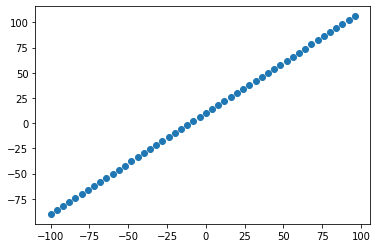

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x,y)


### Split the data

* Training data - 70-80%
* Validation set - 10-15%
* Test set - 10-15%


In [11]:
x_train = x[:40] # 80% of the data
y_train = y[:40]

x_test = x[40:] # 20% of the data
y_test = y[40:]

len(x_train), len(x_test)

(40, 10)

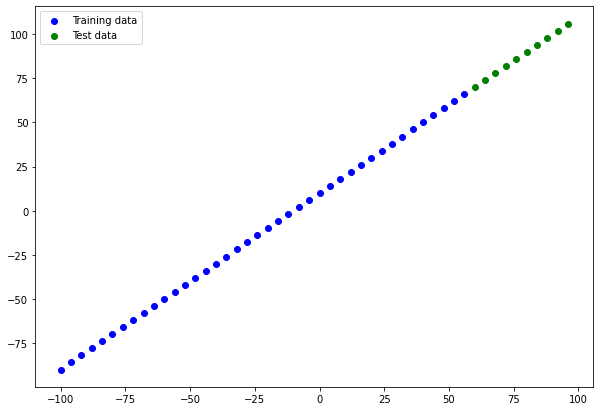

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, c="b", label="Training data")
plt.scatter(x_test, y_test, c="g", label="Test data")
plt.legend();


In [19]:
tf.random.set_seed(42)

model = tf.keras.Sequential( [
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layer")
], name="MyModel")

model.compile(loss=tf.keras.losses.mae, 
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"])

model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [21]:
#visualize the model
model.summary()

Model: "MyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


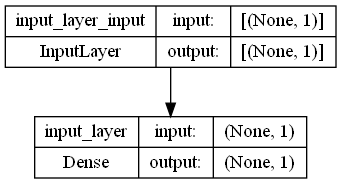

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)